# Summative Assessment - Data Analytics and Visualization

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

The data has been downloaded for you

In [6]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [ ]:
# Import the libraries you'll be using and load the data into a pandas dataframe here

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import calendar
import random as rnd
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy import stats
from scipy.stats import pearsonr
from sklearn import linear_model

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('household_power_consumption-household_power_consumption.csv', sep=',',
                names = ['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'],
                low_memory=False, encoding='iso8859_15')
df.shape

(260641, 9)

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [33]:
# Look at the data you've loaded

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0
2,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0
3,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0
4,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0


In [5]:
df = df.iloc[1:,:]   #clean up the data frame by removing the first row
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0
2,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0
3,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0
4,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0
5,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0


In [6]:
df.dtypes

Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           object
dtype: object

In [7]:
#Merge Date and Time colum, change to date time format
df["DateTime"] = (df["Date"] + " " + df["Time"]).map(lambda x: pd.to_datetime(x, infer_datetime_format=True, errors='coerce'))

#Change all column below to float format
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce').fillna(0).astype(float)
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce').fillna(0).astype(float)
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce').fillna(0).astype(float)
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce').fillna(0).astype(float)
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce').fillna(0).astype(float)
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce').fillna(0).astype(float)
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce').fillna(0).astype(float)                

In [8]:
df = df[['DateTime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' ]]

In [9]:
df.dtypes

DateTime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [10]:
df.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2,2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
3,2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
4,2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
5,2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,260640.000000,260640.000000,260640.000000,260640.000000,260640.000000,260640.000000,260640.000000
mean,1.148082,0.121939,235.748050,4.902779,1.313202,1.646440,5.747449
std,1.181469,0.112038,28.785974,4.998618,6.658190,6.586236,8.157050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292000,0.000000,236.500000,1.200000,0.000000,0.000000,0.000000
50%,0.534000,0.104000,239.540000,2.400000,0.000000,0.000000,0.000000
75%,1.590000,0.192000,241.780000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


In [12]:
print('Size of raw csv file:',df.size)
print('Shape of the raw csv file',df.shape)
print('\n','Raw csv info \n')
df.info()

Size of raw csv file: 2085120
Shape of the raw csv file (260640, 8)

 Raw csv info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 1 to 260640
Data columns (total 8 columns):
DateTime                 260640 non-null datetime64[ns]
Global_active_power      260640 non-null float64
Global_reactive_power    260640 non-null float64
Voltage                  260640 non-null float64
Global_intensity         260640 non-null float64
Sub_metering_1           260640 non-null float64
Sub_metering_2           260640 non-null float64
Sub_metering_3           260640 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 15.9 MB


### Feedback on the data
Some basic sumamry statistics onthe row data set. 
- Size of the file : 2345769
- Shape of the file: 260641 rows with 9 columns

Moving onto the next portion of the. 

Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

### Sample set : 1000

In [13]:
df1 = df.iloc[0:1000].sample(1000)   #sampling the first 1000 rows
df1.head()  

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
891,2007-01-01 14:50:00,2.760,0.268,238.75,11.6,0.0,1.0,17.0
439,2007-01-01 07:18:00,2.476,0.124,240.53,10.2,0.0,0.0,0.0
659,2007-01-01 10:58:00,2.508,0.000,236.82,10.6,0.0,0.0,0.0
54,2007-01-01 00:53:00,2.484,0.000,241.98,10.2,0.0,0.0,0.0
707,2007-01-01 11:46:00,2.592,0.118,236.24,10.8,0.0,0.0,0.0


In [14]:
df2 = df.iloc[75000:76000].sample(1000)   #sampling from 75000 to 76000 to get 1000 row sample
df2.tail()  

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
75517,2007-02-22 10:36:00,1.316,0.000,239.49,5.4,0.0,0.0,18.0
75958,2007-02-22 17:57:00,0.704,0.086,239.43,3.0,0.0,2.0,0.0
75325,2007-02-22 07:24:00,3.720,0.170,235.97,15.8,0.0,0.0,17.0
75378,2007-02-22 08:17:00,3.474,0.180,238.74,14.4,0.0,1.0,17.0
75016,2007-02-22 02:15:00,2.284,0.000,239.33,9.4,0.0,0.0,0.0


Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [17]:
# Answer here - explain your code and reasoning with extra cells for explanation.

In [74]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.384750,0.101824,240.421420,9.874600,0.0,0.246000,3.161000
std,0.573988,0.091648,2.011932,2.345493,0.0,0.545694,6.738582
min,0.204000,0.000000,235.300000,0.800000,0.0,0.000000,0.000000
25%,2.420000,0.000000,238.790000,9.800000,0.0,0.000000,0.000000
50%,2.512000,0.114000,240.560000,10.400000,0.0,0.000000,0.000000
75%,2.602000,0.138000,241.910000,10.800000,0.0,0.000000,0.000000
max,3.558000,0.454000,245.070000,14.600000,0.0,2.000000,19.000000


In [75]:
df2.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,1.816898,0.086158,239.824280,7.572200,0.0,0.249000,6.926000
std,1.172516,0.074981,2.088358,4.927574,0.0,0.552543,8.534833
min,0.252000,0.000000,233.840000,1.000000,0.0,0.000000,0.000000
25%,0.719000,0.046000,238.480000,3.000000,0.0,0.000000,0.000000
50%,1.560000,0.078000,239.755000,6.400000,0.0,0.000000,0.000000
75%,2.384000,0.114000,241.402500,9.800000,0.0,0.000000,17.000000
max,8.244000,0.356000,244.970000,35.000000,0.0,2.000000,18.000000


### Answer to: If df1 = df2 in size

No, they don’t match as well as I hoped on either the mean nor on the standard deviation. I looked at the data set and the numerical value's captured be each meter are different (some meters recorded a large value and others nothing) and this would influence the mean and standard deviation totals.

Create one new dataframewith the first 10,000 rows of data. Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

### Sample set : 10000

In [181]:
df3 = df.iloc[0:10000].sample(10000)      #sample the first 10000 rows of the data set
df3.head() 

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2202,2007-02-01 12:41:00,0.374,0.000,241.64,1.6,0.0,0.0,0.0
1049,2007-01-01 17:28:00,2.202,0.254,239.02,9.2,0.0,1.0,18.0
3746,2007-03-01 14:25:00,1.350,0.054,244.08,5.4,0.0,0.0,19.0
3210,2007-03-01 05:29:00,1.394,0.130,241.82,5.8,0.0,0.0,18.0
6806,2007-05-01 17:25:00,2.346,0.130,237.86,9.8,0.0,2.0,18.0


In [16]:
n = 10000           #take 10,000 random samples from the overall df
df_small = df.take(np.random.permutation(len(df))[:n])
df_small.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
94559,2007-07-03 15:58:00,1.370,0.066,242.44,5.6,0.0,0.0,18.0
37363,2007-01-26 22:42:00,1.854,0.130,242.78,7.6,1.0,0.0,18.0
190333,2007-05-13 04:12:00,0.150,0.000,239.27,0.6,0.0,0.0,0.0
176538,2007-03-05 14:17:00,0.130,0.000,234.30,0.6,0.0,0.0,0.0
201633,2007-05-21 00:32:00,1.328,0.048,234.28,5.6,0.0,1.0,17.0


In [182]:
df3.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.483666,0.133779,240.906520,6.26116,0.585700,1.752500,5.274900
std,1.194093,0.112438,3.350382,5.00432,4.424049,7.661091,8.026118
min,0.204000,0.000000,226.320000,0.80000,0.000000,0.000000,0.000000
25%,0.394000,0.048000,238.640000,1.80000,0.000000,0.000000,0.000000
50%,1.372000,0.134000,241.110000,5.80000,0.000000,0.000000,0.000000
75%,2.378000,0.188000,243.210000,9.80000,0.000000,0.000000,17.000000
max,8.044000,0.862000,250.020000,35.60000,39.000000,75.000000,19.000000


In [18]:
df_small.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.163341,0.122064,235.533586,4.967900,1.494500,1.597600,5.764300
std,1.199807,0.111805,29.671832,5.078052,7.156053,6.572959,8.169089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.292000,0.000000,236.527500,1.200000,0.000000,0.000000,0.000000
50%,0.548000,0.104000,239.520000,2.600000,0.000000,0.000000,0.000000
75%,1.614000,0.192000,241.800000,6.800000,0.000000,1.000000,17.000000
max,9.486000,0.960000,249.520000,40.800000,75.000000,75.000000,19.000000


### Answer to: If df3 = df_small in size
Yes comparing these two pandas the mean and standard deviation look closer to each other. 

I used df3 from here on out.

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

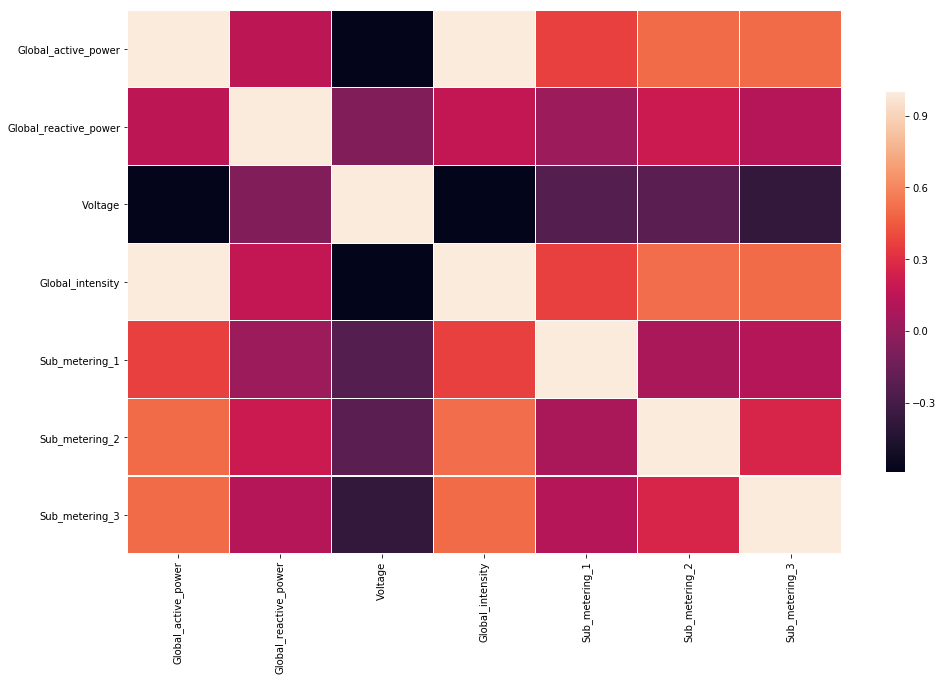

In [183]:
corr = df3.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, linewidths=.08,                   
            cbar_kws={"shrink": .7})  

### First Correlation - Global active power vs. Sub metering 2 - High Correlation 1

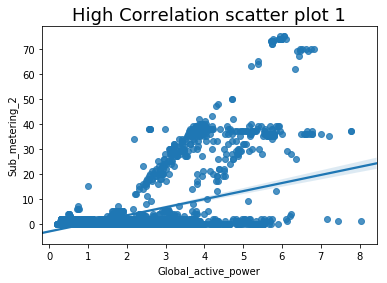

In [112]:
fig = sns.regplot(df3['Global_active_power'], df3['Sub_metering_2'])
plt.title("High Correlation scatter plot 1", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.show(fig)

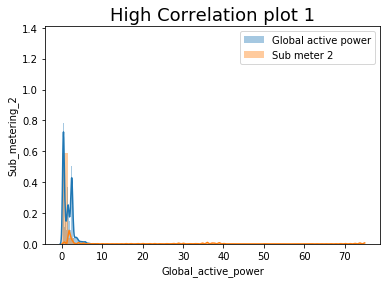

In [113]:
fig = sns.distplot(df3['Global_active_power'], label="Global active power")
fig = sns.distplot(df3['Sub_metering_2'], label="Sub meter 2")
plt.title("High Correlation plot 1", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.legend()
plt.show(fig)

In [114]:
r,p = stats.pearsonr(df3['Global_active_power'], df3['Sub_metering_2'])
print('r', r)
print('p', p)

r 0.5033187293019145
p 0.0


#### Insight into Correlation - High 1
Looking at the two graphs I can see a nice overlap and spread of the two data values. Looking at the high r-value (0.503) indicates that 'Sub meter 2' does add to the overall energy draw on 'Global active power' meter / house. It could be that the large home appliance’s are connected to this sub meter.

### Second Correlation - Global active power vs. Sub metering 3 - High Correlation 2

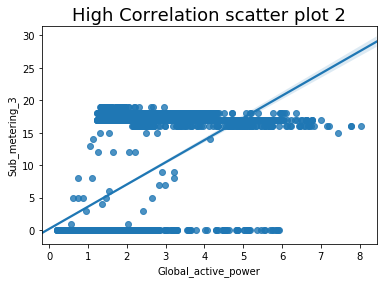

In [115]:
fig = sns.regplot(df3['Global_active_power'], df3['Sub_metering_3'])
plt.title("High Correlation scatter plot 2", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_3', fontsize=10)
plt.show(fig)

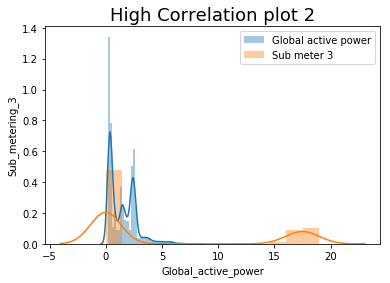

In [116]:
fig = sns.distplot(df3['Global_active_power'], label="Global active power")
fig = sns.distplot(df3['Sub_metering_3'], label="Sub meter 3")
plt.title("High Correlation plot 2", fontsize = 18)
plt.xlabel('Global_active_power', fontsize=10)
plt.ylabel('Sub_metering_3', fontsize=10)
plt.legend()
plt.show(fig)

In [117]:
r,p = stats.pearsonr(df3['Global_active_power'], df3['Sub_metering_3'])
print('r', r)
print('p', p)

r 0.5087491542138285
p 0.0


#### Insight into Correlation - High 2
Looking at the two graphs I can see a higher overlap and spread of the two data values compared to 'High Correlation 1'. Looking at the high r-value (0.509) indicates that 'Sub meter 3' draws more energy compared to submeter 2 which adds to the overall energy draw on 'Global active power' meter / house. It could be that the large/more home appliance’s are connected to this sub meter. Or this could be that this circuit gets used more or longer.

### Third Correlation - Voltage vs. Sub metering 2 - Low Correlation

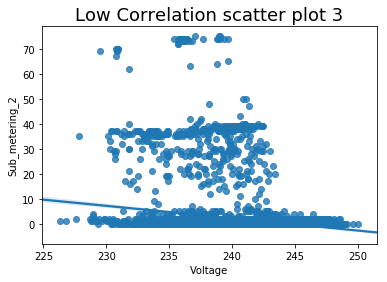

In [118]:
fig = sns.regplot(df3['Voltage'], df3['Sub_metering_2'])
plt.title("Low Correlation scatter plot 3", fontsize = 18)
plt.xlabel('Voltage', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.show(fig)

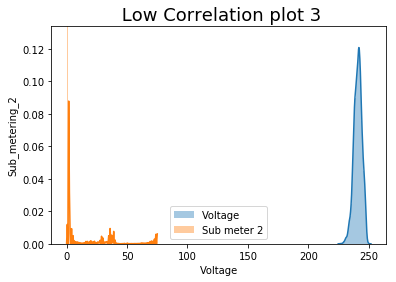

In [119]:
fig = sns.distplot(df3['Voltage'], label="Voltage")
fig = sns.distplot(df3['Sub_metering_2'], label="Sub meter 2")
plt.title(" Low Correlation plot 3", fontsize = 18)
plt.xlabel('Voltage', fontsize=10)
plt.ylabel('Sub_metering_2', fontsize=10)
plt.legend()
plt.show(fig)

In [120]:
r,p = stats.pearsonr(df3['Voltage'], df3['Sub_metering_2'])
print('r', r)
print('p', p)

r -0.21658011591889909
p 1.831731373920038e-106


#### Insight into Correlation - Low
Looking at the two graphs I can see a little overlap and spread of the two data values. Looking at the high r-value (-0.217) indicates that 'Sub meter 2' does not add to the overall voltage draw on 'Voltage' meter. This could indicate that the home appliance’s are well balanced and do not cause a shift in phase's.

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [ ]:
# Build a simple model and find parameters, as well as the R-Squared Value

Intercept:    -0.009039860825678758
Coefficient:  [0.2384073]


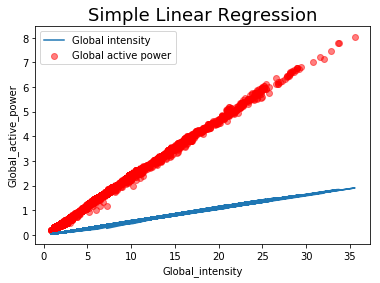

In [184]:
# Initialize the model, and name it lr1
lr1 = linear_model.LinearRegression()

#input data is in the right format for the explanatory variable
INPUT = np.array(df3['Global_intensity']).reshape(-1, 1)

# Fit the data
lr1.fit(X = INPUT,y = df3['Global_active_power'])

# Print intercept and coefficient
print("Intercept:   ",lr1.intercept_)
print("Coefficient: ",lr1.coef_)

# Plot the data and the prediction
plt.scatter(df3['Global_intensity'], df3['Global_active_power'],  c="r", alpha=0.5, label="Global active power")
# Line of best fit. NB, doing this manually based on the parameters
plt.plot(df3['Global_intensity'], [lr1.coef_*x +lr1.intercept_ for x in df3['Global_active_power']], label="Global intensity") # We could also use lr1.predict(x), as in next example
plt.title("Simple Linear Regression", fontsize = 18)
plt.xlabel("Global_intensity", fontsize=10)
plt.ylabel("Global_active_power", fontsize=10)
plt.legend()

In [185]:
# First, a simple linear regression model (one input var)
INPUT = np.array(df3['Global_intensity']).reshape(-1, 1)
slr = linear_model.LinearRegression()
slr.fit(X = INPUT,y = df3['Global_active_power'])
print("Score with simple linear model: ", slr.score(INPUT, df3['Global_active_power']))

# Now the multiple regression model we developed above - two input vars
INPUT = np.array(df3['Global_intensity']).reshape(-1, 1)
mlr = linear_model.LinearRegression()
mlr.fit(X = INPUT,y = df3['Global_active_power'])
print("Score with second input:        ",mlr.score(INPUT, df3['Global_active_power']))

Score with simple linear model:  0.9982814190548718
Score with second input:         0.9982814190548718


In [186]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df3['Global_intensity'], df3['Global_active_power'])
print("r-squared:", r_value**2)

r-squared: 0.9982814190548729


#### Answer
From the two Linear regression models we get:
- Model Parameters :
Intercept:   -0.0090
; Coefficient: 0.2384
- Score of : 0.9983
- r-squared:  0.9983

As we can see that the two do not follow the same path and deviate indicating that we are introducing harmonics to the power grid.

## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

In [187]:
df3['Sub_Sum'] = (df3["Sub_metering_1"] + df3["Sub_metering_2"] + df3["Sub_metering_3"])
df3.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_Sum
2202,2007-02-01 12:41:00,0.374,0.000,241.64,1.6,0.0,0.0,0.0,0.0
1049,2007-01-01 17:28:00,2.202,0.254,239.02,9.2,0.0,1.0,18.0,19.0
3746,2007-03-01 14:25:00,1.350,0.054,244.08,5.4,0.0,0.0,19.0,19.0
3210,2007-03-01 05:29:00,1.394,0.130,241.82,5.8,0.0,0.0,18.0,18.0
6806,2007-05-01 17:25:00,2.346,0.130,237.86,9.8,0.0,2.0,18.0,20.0


### Conversion attempt
I tried to convert the sum of all the submeters watt-hours to the same standard unit of Global active power kilowatt.
Formule not quote right though

In [188]:
df3["Sub_Sum"] = round(df3["Sub_Sum"] / (1000), 4)
df3.head()

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_Sum
2202,2007-02-01 12:41:00,0.374,0.000,241.64,1.6,0.0,0.0,0.0,0.000
1049,2007-01-01 17:28:00,2.202,0.254,239.02,9.2,0.0,1.0,18.0,0.019
3746,2007-03-01 14:25:00,1.350,0.054,244.08,5.4,0.0,0.0,19.0,0.019
3210,2007-03-01 05:29:00,1.394,0.130,241.82,5.8,0.0,0.0,18.0,0.018
6806,2007-05-01 17:25:00,2.346,0.130,237.86,9.8,0.0,2.0,18.0,0.020


Intercept:    -0.004237278814383359
Coefficient:  [0.00798723]


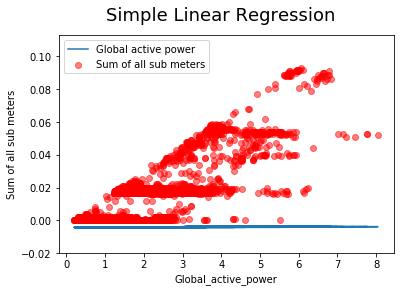

In [189]:
# Initialize the model, and name it lr1
lr1 = linear_model.LinearRegression()

#input data is in the right format for the explanatory variable
INPUT = np.array(df3['Global_active_power']).reshape(-1, 1)

# Fit the data
lr1.fit(X = INPUT,y = df3['Sub_Sum'])

# Print intercept and coefficient
print("Intercept:   ",lr1.intercept_)
print("Coefficient: ",lr1.coef_)

# Plot the data and the prediction
plt.scatter(df3['Global_active_power'], df3['Sub_Sum'],  c="r", alpha=0.5, label="Sum of all sub meters")
# Line of best fit. NB, doing this manually based on the parameters
plt.plot(df3['Global_active_power'], [lr1.coef_*x +lr1.intercept_ for x in df3['Sub_Sum']], label="Global active power") # We could also use lr1.predict(x), as in next example
plt.suptitle("Simple Linear Regression", fontsize = 18)
plt.xlabel("Global_active_power", fontsize=10)
plt.ylabel("Sum of all sub meters", fontsize=10)
plt.legend()

In [190]:
# First, a simple linear regression model (one input var)
INPUT = np.array(df3['Global_active_power']).reshape(-1, 1)
slr = linear_model.LinearRegression()
slr.fit(X = INPUT,y = df3['Sub_Sum'])
print("Score with simple linear model: ", slr.score(INPUT, df3['Sub_Sum']))

# Now the multiple regression model we developed above - two input vars
INPUT = np.array(df3['Global_active_power']).reshape(-1, 1)
mlr = linear_model.LinearRegression()
mlr.fit(X = INPUT,y = df3['Sub_Sum'])
print("Score with second input:        ",mlr.score(INPUT, df3['Sub_Sum']))

Score with simple linear model:  0.48153897378552946
Score with second input:         0.48153897378552946


In [191]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df3['Global_active_power'], df3['Sub_Sum'])
print("r-squared:", r_value**2)

r-squared: 0.48153897378552857


#### Answer
From the two Linear regression models we get the above answers.

My prediction is not as accurate as I would like it to be (I think this is because the convertion of the units might not be correct). 

What is great though is that the sum of all the sub meters does track along the same line as the Global active power meter.

## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

In [282]:
# Plot of sigmoid:
def sig(a, r):
    X = df3["Sub_metering_1"]
    Y = df3["Sub_metering_2"]  
    plt.plot(X, Y)
# sig(1, 5)
from ipywidgets import interact, fixed
import ipywidgets as widgets
interact(sig, a=(1, 3.0), r=(1, 10))

interactive(children=(FloatSlider(value=2.0, description='a', max=3.0, min=1.0), IntSlider(value=5, description='r', max=10, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.sig>

ValueError: operands could not be broadcast together with shapes (58,1001) (58,) 

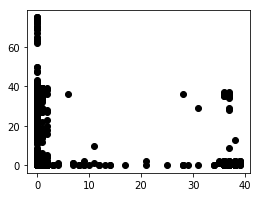

In [281]:
from sklearn import linear_model

X = df3["Sub_metering_1"]
y = df3["Sub_metering_2"]

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(0, 1, 1001)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(0, 10000))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?

#### Answering: What time of day is the kitchen used?

From the documentation we know that Sub meter 1 monitors the Kitchen.

Text(0,0.5,'Energy used')

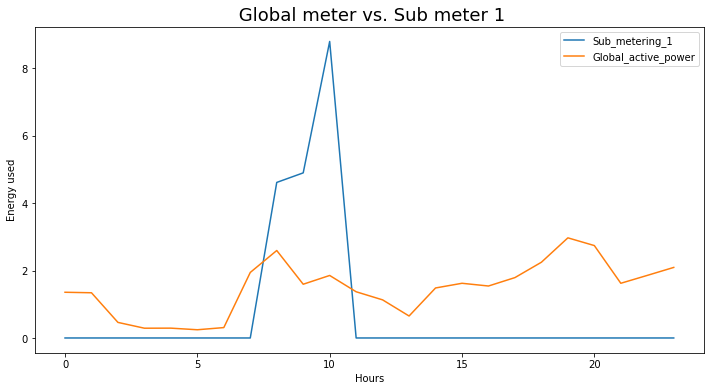

In [277]:
df.index = df["DateTime"]
days = df.loc['2007-01-15 00:01:00':'2007-01-15 23:00:00']
dayg = df.loc['2007-01-15 00:01:00':'2007-01-15 23:00:00']
axis = days.resample('1H').mean().reset_index().plot(y='Sub_metering_1', figsize=(12, 6))
dayg.resample('1H').mean().reset_index().plot(y='Global_active_power', figsize=(12, 6), ax=axis)
plt.title(" Global meter vs. Sub meter 1", fontsize = 18)
plt.xlabel('Hours', fontsize=10)
plt.ylabel('Energy used', fontsize=10)

Comparing Sub meter 1to the Global power meter we can see that the meter / kitchen is not in use the entire day.

#### Answering: Does the weekly power consumption remain constant?

I used the Global active power meter to determine this.

Text(0,0.5,'Energy used')

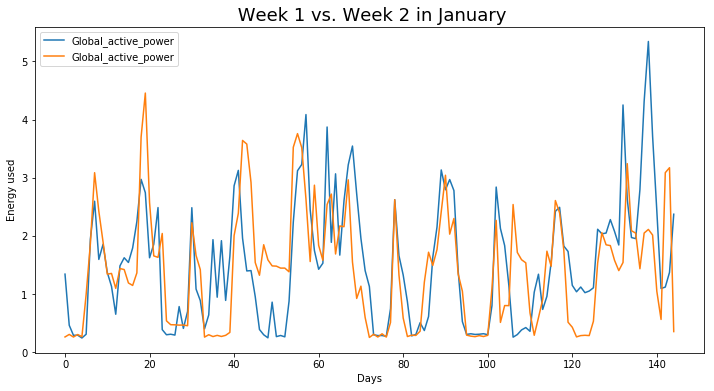

In [280]:
df.index = df["DateTime"]
week1 = df.loc['2007-01-15 01:00:00':'2007-01-21 01:00:00']
week2 = df.loc['2007-01-22 01:00:00':'2007-01-28 01:00:00']
axis = week1.resample('1H').mean().reset_index().plot(y='Global_active_power', figsize=(12, 6))
week2.resample('1H').mean().reset_index().plot(y='Global_active_power', figsize=(12, 6), ax=axis)
plt.title(" Week 1 vs. Week 2 in January", fontsize = 18)
plt.xlabel('Days', fontsize=10)
plt.ylabel('Energy used', fontsize=10)

Comparing these two weeks' worth of data to each other we can assume that the energy used by the house is the same. 

#### Answering: Which sub-metering zone used the most power?

Here I used the entire data set to determine this.

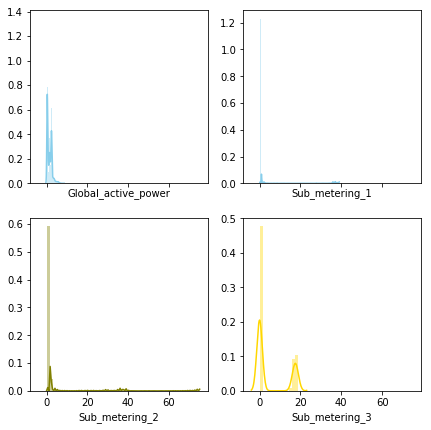

In [229]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df3["Global_active_power"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df3["Sub_metering_1"] , color="skyblue", ax=axes[0, 1])
sns.distplot( df3["Sub_metering_2"] , color="olive", ax=axes[1, 0])
sns.distplot( df3["Sub_metering_3"] , color="gold", ax=axes[1, 1])

In [228]:
Sub1_total = df3["Sub_metering_1"].sum()
print("Total energy consumption on Sub meter 1:", Sub1_total)
Sub2_total = df3["Sub_metering_2"].sum()
print("Total energy consumption on Sub meter 2:", Sub2_total)
Sub3_total = df3["Sub_metering_3"].sum()
print("Total energy consumption on Sub meter 3:", Sub3_total)

Total energy consumption on Sub meter 1: 5857.0
Total energy consumption on Sub meter 2: 17525.0
Total energy consumption on Sub meter 3: 52749.0


Looking at the histogram graphs and have read the documentation of what appliances are connected to the meters, I would assume that Sub meter 3 would have the highest draw. To confirm this is calculated the energy consumption of the three different zones where Sub meter 3 had the highest energy consumption. Referring to the documentation and own personal experience the water-heater and air-conditioner do consume and need to either keep water hot all day long or rooms cold / warm for part of a day. 